In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
path  = '/content/drive/My Drive/csv-data/weatherAUS.csv'
data = pd.read_csv(path)
data = data.dropna()

In [69]:
X = data[['MinTemp','MaxTemp','Humidity9am']].values
Y = data['Rainfall'].values

In [70]:
def compute(x,y,weight,bias):
  pred = x @ weight + bias
  loss  = pred - y

  return np.mean(loss)**2

In [71]:
def gradient(x,y,weight,bias,learning_rate):
   pred = x @ weight + bias
   loss = pred - y

   gradient_weight = (2/len(x)) * np.sum(x.T @ loss)
   gradient_bias = (2/len(x)) * np.sum(loss)

   weight -= learning_rate * gradient_weight
   bias -= learning_rate * gradient_bias

   return weight , bias

In [76]:
def model(x,y,learning_rate ,epochs , batch):
   np.random.seed(40)
   weight = np.random.randn(3) * 0.01
   bias = np.random.randn() * 0.001
   chat = []

   for epoch in range(epochs):
      re_range = np.random.permutation(len(x))
      shuffle_x = x[re_range]
      shuffle_y = y[re_range]

      for i in range(0,len(y),batch):
          y_batch = shuffle_y[epoch:epoch+batch]
          x_batch = shuffle_x[epoch:epoch+batch]

          weight , bias = gradient(x_batch, y_batch , weight , bias, learning_rate)
          loss = compute(x , y , weight , bias)
          chat.append(loss)

   return chat

In [77]:
x = (X - X.mean()) / X.std()

In [82]:
full_batch = len(x)
mini_batch = 200
sgd = 1
epoch = 500
learning_rate = 0.01

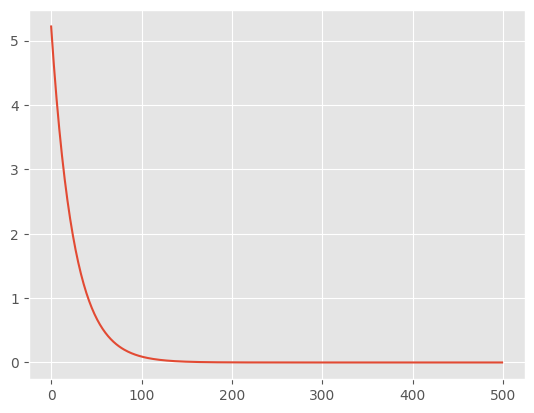

In [88]:

plt.style.use('ggplot')
plt.plot(model(x,Y,learning_rate,epoch,full_batch))
# plt.plot(model(x,Y,learning_rate,epoch,mini_batch))
# plt.plot(model(x,Y,learning_rate,epoch,sgd))

plt.grid(True)
plt.show()